In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
df = pd.read_csv("AmazonReview.csv")
df

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
df.describe()

,Sentiment
count,25000.000000
mean,3.000000
std,1.414242
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [5]:
df["Sentiment"].value_counts()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    5000
Name: count, dtype: int64

In [6]:
def map_sentiment(rating):
  if rating <= 2:
      return "Negative"
  if rating ==3:
      return "Neutral"
  else:
      return "Positive"

df["label"] = df["Sentiment"].apply(map_sentiment)
df["label"].value_counts()

label
Negative    10000
Positive    10000
Neutral      5000
Name: count, dtype: int64

In [7]:
df

,Review,Sentiment,label
0,Fast shipping but this product is very cheaply...,1,Negative
1,This case takes so long to ship and it's not e...,1,Negative
2,Good for not droids. Not good for iPhones. You...,1,Negative
3,The cable was not compatible between my macboo...,1,Negative
4,The case is nice but did not have a glow light...,1,Negative
...,...,...,...
24995,These cables (lightning) are far superior to m...,5,Positive
24996,This unit performs exactly as advertised. I u...,5,Positive
24997,I had the key cut at a local hardware store cu...,5,Positive
24998,I love my case I ordered from amazon. It wasn'...,5,Positive


In [8]:
df["Review_lenght"] = df["Review"].apply(lambda x: len(str(x).split()))

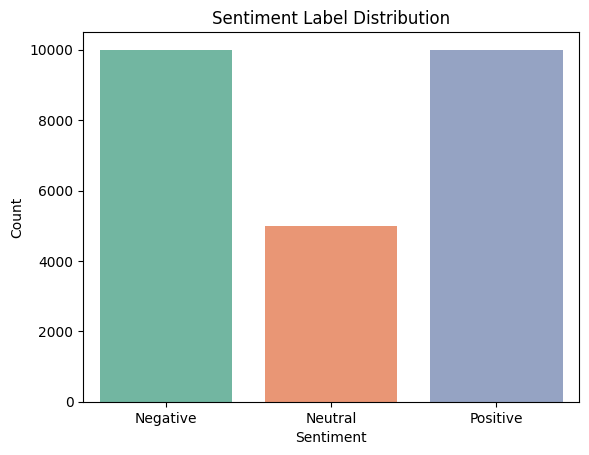

In [9]:
sns.countplot(data = df,x ='label', hue = 'label', palette= 'Set2')
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure required resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    try:
        text = str(text).lower()  # lowercase
        text = re.sub(r'<.*?>', ' ', text)  # remove HTML tags
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # keep only letters and space
        text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
        tokens = word_tokenize(text)
        cleaned_tokens = [
            lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
        ]
        return ' '.join(cleaned_tokens)
    except Exception as e:
        print("Error in cleaning:", text)
        print(e)
        return ""


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df['cleaned_reviews'] = df['Review'].apply(clean_text)

In [13]:
df['cleaned_reviews']

0        fast shipping product cheaply made brought gra...
1                  case take long ship even worth dont buy
2        good droids good iphones use feature watch iph...
3        cable compatible macbook iphone also connector...
4        case nice glow light disappointed product meet...
                               ...                        
24995    cable lightning far superior cable market even...
24996    unit performs exactly advertised use climbing ...
24997    key cut local hardware store cut free programm...
24998    love case ordered amazon color looked online f...
24999    awsome loved little speaker great sound super ...
Name: cleaned_reviews, Length: 25000, dtype: object

In [14]:
df

,Review,Sentiment,label,Review_lenght,cleaned_reviews
0,Fast shipping but this product is very cheaply...,1,Negative,42,fast shipping product cheaply made brought gra...
1,This case takes so long to ship and it's not e...,1,Negative,15,case take long ship even worth dont buy
2,Good for not droids. Not good for iPhones. You...,1,Negative,29,good droids good iphones use feature watch iph...
3,The cable was not compatible between my macboo...,1,Negative,20,cable compatible macbook iphone also connector...
4,The case is nice but did not have a glow light...,1,Negative,20,case nice glow light disappointed product meet...
...,...,...,...,...,...
24995,These cables (lightning) are far superior to m...,5,Positive,47,cable lightning far superior cable market even...
24996,This unit performs exactly as advertised. I u...,5,Positive,179,unit performs exactly advertised use climbing ...
24997,I had the key cut at a local hardware store cu...,5,Positive,56,key cut local hardware store cut free programm...
24998,I love my case I ordered from amazon. It wasn'...,5,Positive,43,love case ordered amazon color looked online f...


In [15]:
# Join all cleaned reviews per sentiment
positive_text = ' '.join(df[df['label'] == 'Positive']['cleaned_reviews'])
neutral_text  = ' '.join(df[df['label'] == 'Neutral']['cleaned_reviews'])
negative_text = ' '.join(df[df['label'] == 'Negative']['cleaned_reviews'])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)


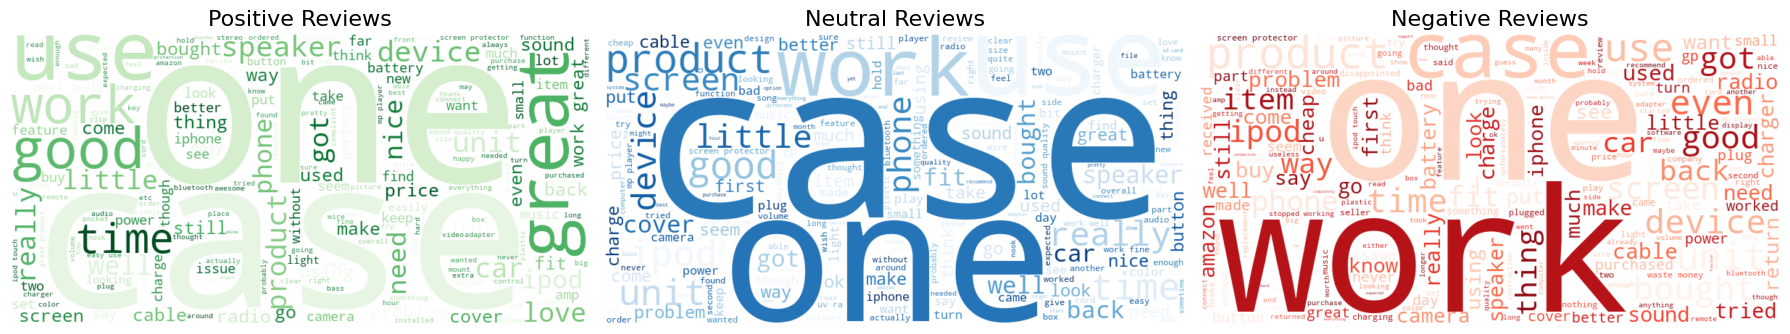

In [16]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=16)

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews', fontsize=16)

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=16)

plt.tight_layout()

plt.savefig("sentiment_wordclouds.png", dpi=300, bbox_inches='tight')
plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =  TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(df['cleaned_reviews'])
y = df['label']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 42, stratify = y)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print('Accuracy:' , accuracy_score(y_test,y_pred))
print('\nClassification Report:\n\n', classification_report(y_test, y_pred))

Accuracy: 0.6958

Classification Report:

               precision    recall  f1-score   support

    Negative       0.71      0.82      0.76      2000
     Neutral       0.45      0.22      0.29      1000
    Positive       0.73      0.81      0.77      2000

    accuracy                           0.70      5000
   macro avg       0.63      0.62      0.61      5000
weighted avg       0.67      0.70      0.67      5000



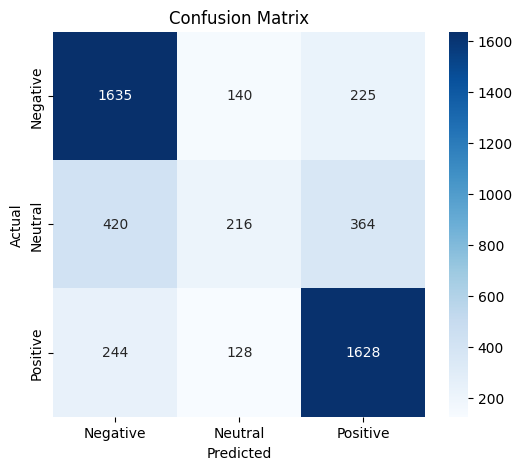

In [22]:
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot = True,fmt ='d',cmap='Blues', xticklabels = model.classes_, yticklabels = model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion Matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [23]:
feature_names = vectorizer.get_feature_names_out()


In [24]:
coeff_df = pd.DataFrame(model.coef_, columns=feature_names, index=model.classes_)
coeff_df


,aa,aaa,ab,ability,able,absolute,absolutely,abuse,abused,ac,...,yr,zagg,zebra,zen,zero,zip,zipper,zone,zoom,zune
Negative,-0.157973,-0.420018,0.088920,-0.155050,0.095774,0.038029,-0.710014,-0.403474,-0.135292,-0.123113,...,-0.173799,0.003242,-0.362849,0.167622,0.963459,0.288390,0.046891,-0.541255,0.143817,-0.269825
Neutral,0.138438,-0.258527,-0.187142,0.121834,0.193285,-0.285070,0.120436,0.256662,-0.522051,-0.282868,...,-0.322834,-0.022002,0.450590,-0.645834,-0.919364,0.330278,-0.370019,0.224015,0.190365,-0.121006
Positive,0.019535,0.678545,0.098222,0.033216,-0.289059,0.247041,0.589579,0.146812,0.657343,0.405982,...,0.496633,0.018760,-0.087741,0.478212,-0.044095,-0.618669,0.323128,0.317240,-0.334183,0.390831


In [25]:
coeff_df.loc['Positive'].sort_values(ascending=False).head(15)


great        5.074042
love         4.147397
perfectly    3.965206
perfect      3.906716
excellent    3.375106
amazing      3.202215
highly       3.014035
easy         2.934084
pleased      2.904693
exactly      2.662440
happy        2.409239
complaint    2.381524
awesome      2.225061
solid        2.195178
well         2.157215
Name: Positive, dtype: float64

In [26]:
coeff_df.loc['Negative'].sort_values(ascending=False).head(15)


waste           3.815498
poor            3.164068
useless         2.994177
disappointed    2.874544
stopped         2.782658
junk            2.769484
return          2.479226
garbage         2.420498
refund          2.410554
returning       2.402839
horrible        2.322719
returned        2.281631
worst           2.266411
terrible        2.244467
even            2.163060
Name: Negative, dtype: float64

In [27]:
coeff_df.loc['Neutral'].sort_values(ascending=False).head(15)


okay             2.147620
ok               2.107773
however          1.840603
alright          1.713047
decent           1.619377
unfortunately    1.556783
kinda            1.372754
bit              1.366422
rating           1.351077
hey              1.350124
overall          1.297397
fine             1.263357
mostly           1.262848
hassle           1.261380
job              1.252498
Name: Neutral, dtype: float64

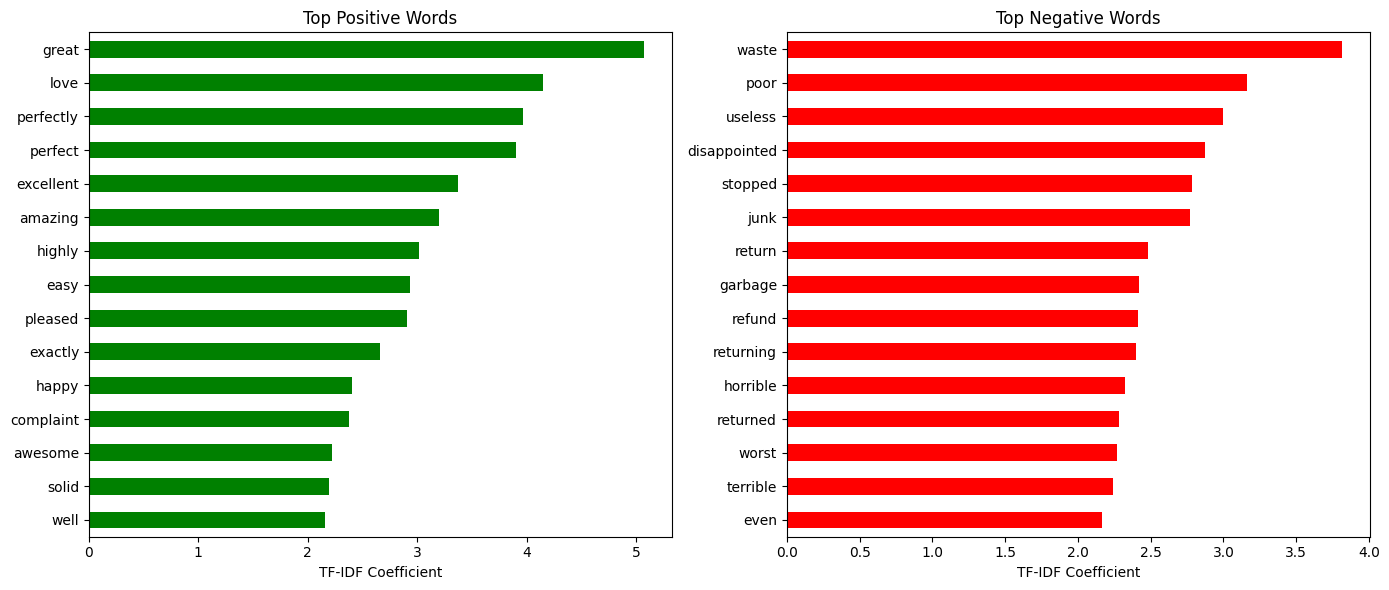

In [28]:
# Plot and Save Top Positive & Negative Words Bar Charts
import matplotlib.pyplot as plt

# Get top 15 positive and negative words
top_pos = coeff_df.loc['Positive'].sort_values(ascending=False).head(15)
top_neg = coeff_df.loc['Negative'].sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 6))

# Positive words plot
plt.subplot(1, 2, 1)
top_pos.plot(kind='barh', color='green')
plt.gca().invert_yaxis()  # Highest at top
plt.title("Top Positive Words")
plt.xlabel("TF-IDF Coefficient")

# Negative words plot
plt.subplot(1, 2, 2)
top_neg.plot(kind='barh', color='red')
plt.gca().invert_yaxis()
plt.title("Top Negative Words")
plt.xlabel("TF-IDF Coefficient")

plt.tight_layout()

# ✅ Save before show
plt.savefig("top_positive_negative_words.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df.to_csv('cleaned_data_Task2.csv', index=False)